<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Scalping Price Action


<br>


📈Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install yfinance
!pip install mpl_finance
!pip install ta

     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 6.4 MB 43.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=f55c0eea5810bff0be1e76be1bd84ba0bdcb59c0f8ed846cb3d6e421c38fdb6b
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams['figure.figsize'] = [20, 8]

# Import the data

In [ ]:
# Import stock prices from Yahoo Finance
df = yf.download("EURUSD=X", start="2010-01-01")

# Create a Date column to plot the Candlestick later (Not mandatory if you don't want to plot the candlestick)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

# Rename columns
df.columns = ["open", "high", "low", "close", "adj close", "volume", "date"]
df.index.name = "time"
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date
time,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,733773.0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,733776.0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,733777.0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,733778.0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,733779.0
...,...,...,...,...,...,...,...
2022-02-23,1.133055,1.135976,1.130736,1.132913,1.132913,0,738209.0
2022-02-24,1.130595,1.130595,1.111049,1.130569,1.130569,0,738210.0
2022-02-25,1.119081,1.126608,1.116807,1.119069,1.119069,0,738211.0


# Support & Resistance building

In [ ]:
# Create empty columns 
df["support"] = np.nan
df["resistance"] = np.nan

# After 5 consequtive decrease of the low, we note this price as a support
df.loc[(df["low"].shift(5) > df["low"].shift(4))&
       (df["low"].shift(4) > df["low"].shift(3))&
       (df["low"].shift(3) > df["low"].shift(2))&
       (df["low"].shift(2) > df["low"].shift(1))&
       (df["low"].shift(1) > df["low"].shift(0)), "support"] = df["low"]


# After 5 consequtive increase of the high, we note this price as a resistance
df.loc[(df["high"].shift(5) < df["high"].shift(4)) &
(df["high"].shift(4) < df["high"].shift(3)) &
(df["high"].shift(3) < df["high"].shift(2)) &
(df["high"].shift(2) < df["high"].shift(1)) &
(df["high"].shift(1) < df["high"].shift(0)), "resistance"] = df["high"]

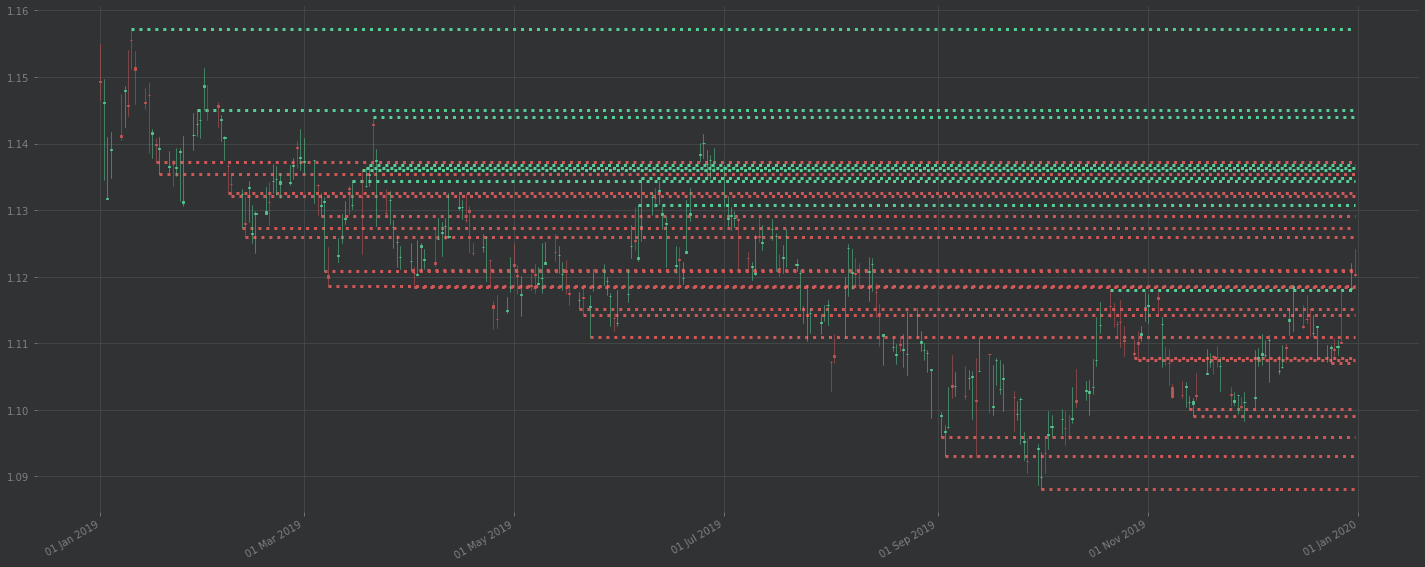

In [ ]:
df_bis = df.loc["2019"]

# Initialize the graph
fig, ax = plt.subplots()

# Plot the candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Put date as the x axis
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Plot resistances lines
for resistance, date in zip(df_bis["resistance"].dropna(), df_bis["resistance"].dropna().index):
  plt.hlines(resistance, xmin=date, xmax=df_bis.index[-1], colors='#57CE95', linestyles=":", linewidth=3)

# Plot supports lines
for support, date in zip(df_bis["support"].dropna(), df_bis["support"].dropna().index):
  plt.hlines(support, xmin=date, xmax=df_bis.index[-1], colors='#CE5757', linestyles=":", linewidth=3)

# Show the figure
fig.show()

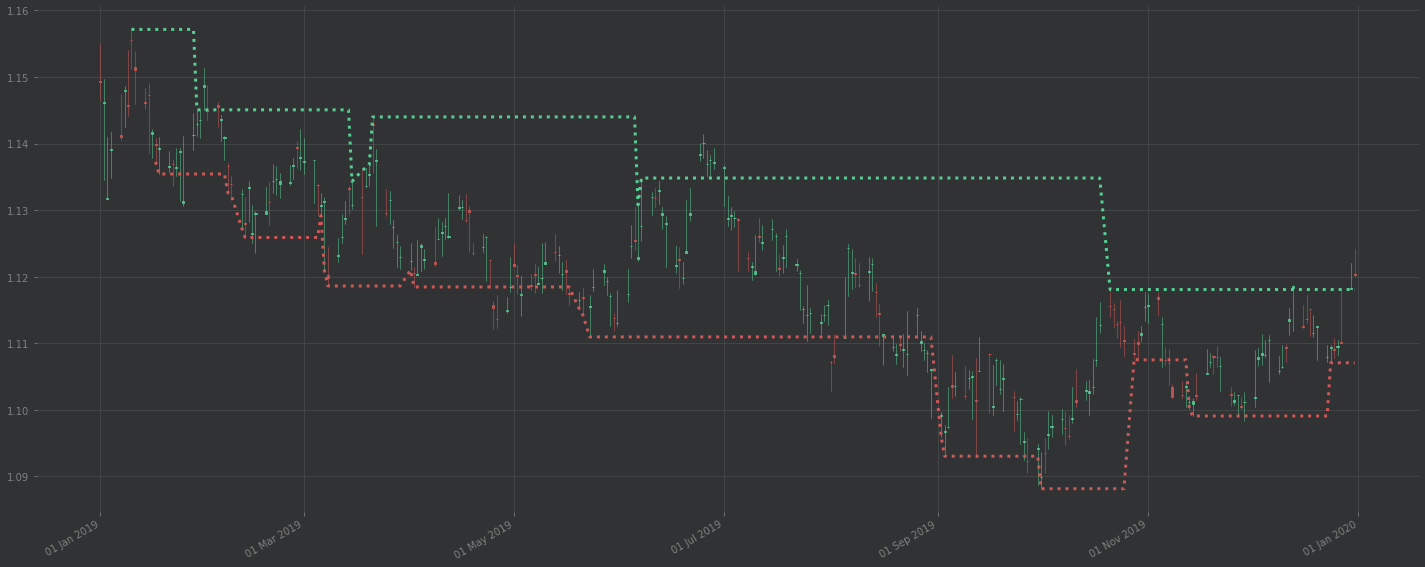

In [ ]:
df = df.loc["2019"]

# Initialize the graph
fig, ax = plt.subplots()

# Plot the candlestick
candlestick_ohlc(ax,df[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Put date as the x axis
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Plot resistances lines
plt.plot(df["support"].fillna(method="ffill"),color='#CE5757', linestyle=":", linewidth=3)


# Plot supports lines
plt.plot(df["resistance"].fillna(method="ffill"),color='#57CE95', linestyle=":", linewidth=3)

# Show the figure
fig.show()

# Support & Resistance strategy

In [ ]:
# Create signal column
df["signal"] = 0

# Smooth the support and resistance to create the strategy
df["smooth resistance"] = df["resistance"].fillna(method="ffill")
df["smooth support"] = df["support"].fillna(method="ffill")

# Create buying conditions
condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) &\
                   (df["smooth resistance"]*(1+0.0/100)<df["close"])

# Create selling conditions
condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) &\
                   (df["smooth support"]*(1-0.0/100)>df["close"])


# Place the signals
df.loc[condition_1_buy, "signal"] = 1
df.loc[condition_1_sell, "signal"] = -1

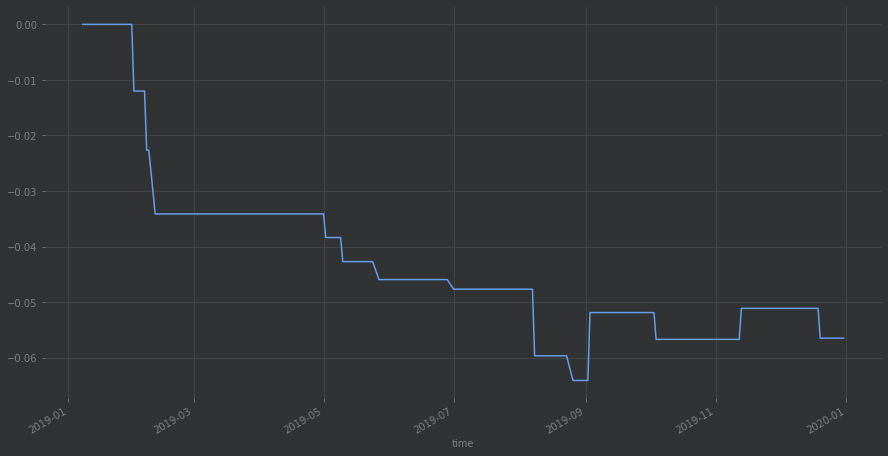

In [ ]:
duration = 5

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))


df["return"].cumsum().plot(figsize=(15,8))

# Support Resistance + SMA

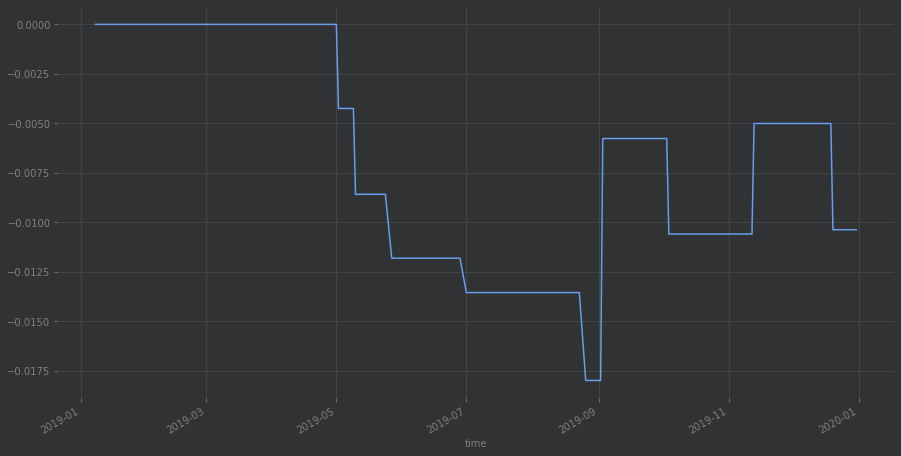

In [ ]:
# Create Simple moving average 30 days
df["SMA fast"] = df["close"].rolling(30).mean()

# Create Simple moving average 60 days
df["SMA slow"] = df["close"].rolling(60).mean()

condition_2_buy = df["SMA fast"] > df["SMA slow"]
condition_2_sell = df["SMA fast"] < df["SMA slow"]



df["signal"] = 0

df.loc[condition_1_buy & condition_2_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell, "signal"] = -1


# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

df["return"].cumsum().plot(figsize=(15,8))

# Support Resistance + SMA + RSI

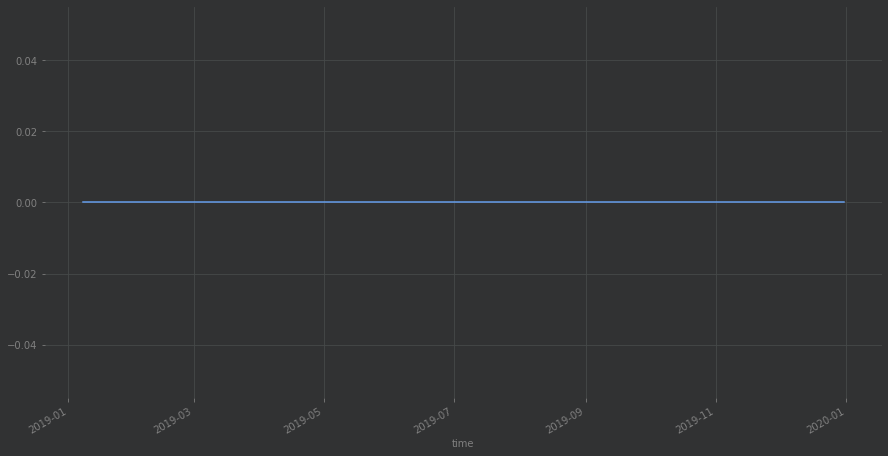

In [ ]:
df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

# RSI yersteday
df["rsi yersteday"] = df["rsi"].shift(1)

df["signal"] = 0
condition_3_buy = df["rsi"] < df["rsi yersteday"]

condition_3_sell = df["rsi"] > df["rsi yersteday"]



df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1


# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

df["return"].cumsum().plot(figsize=(15,8))

# Automate the process

In [ ]:
def support_resistance(df, duration=5,spread=0):
  """THE DATAFRAME NEEDS TO HAVE the following column names: high, low, close"""

  # Support and resistance building
  df["support"] = np.nan
  df["resistance"] = np.nan

  df.loc[(df["low"].shift(5) > df["low"].shift(4)) &
        (df["low"].shift(4) > df["low"].shift(3)) &
        (df["low"].shift(3) > df["low"].shift(2)) &
        (df["low"].shift(2) > df["low"].shift(1)) &
        (df["low"].shift(1) > df["low"].shift(0)), "support"] = df["low"]


  df.loc[(df["high"].shift(5) < df["high"].shift(4)) &
  (df["high"].shift(4) < df["high"].shift(3)) &
  (df["high"].shift(3) < df["high"].shift(2)) &
  (df["high"].shift(2) < df["high"].shift(1)) &
  (df["high"].shift(1) < df["high"].shift(0)), "resistance"] = df["high"]


  # Create Simple moving average 30 days
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Create Simple moving average 60 days
  df["SMA slow"] = df["close"].rolling(60).mean()

  df["rsi"] = ta.momentum.RSIIndicator(df["close"], window=10).rsi()

  # RSI yersteday
  df["rsi yersteday"] = df["rsi"].shift(1)

  # Create the signal
  df["signal"] = 0

  df["smooth resistance"] = df["resistance"].fillna(method="ffill")
  df["smooth support"] = df["support"].fillna(method="ffill")


  condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) & \
                    (df["smooth resistance"]*(1+0.5/100) < df["close"])
  condition_2_buy = df["SMA fast"] > df["SMA slow"]

  condition_3_buy = df["rsi"] < df["rsi yersteday"]

  condition_1_sell = (df["close"].shift(1) > df["smooth support"].shift(1)) & \
                    (df["smooth support"]*(1+0.5/100) > df["close"])
  condition_2_sell = df["SMA fast"] < df["SMA slow"]

  condition_3_sell = df["rsi"] > df["rsi yersteday"]



  df.loc[condition_1_buy & condition_2_buy & condition_3_buy, "signal"] = 1
  df.loc[condition_1_sell & condition_2_sell & condition_3_sell, "signal"] = -1


  # Compute the profits
  df["pct"] = df["close"].pct_change(1)

  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))
  df.loc[df["return"]==-1, "return"] = df["return"]-spread
  df.loc[df["return"]==1, "return"] = df["return"]-spread


  return df["return"]

In [ ]:
# Preprocessing function

def preprocessing_min(name):

  # Import the data
  df = pd.read_csv(name, delimiter="\t", index_col=["<DATE>","<TIME>"] , parse_dates=True).dropna()

  # Delete the two last columns
  df = df.iloc[:,:-2]

  # Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  #df.index.name = "time"
  return df

In [ ]:
dfc = preprocessing_min("EURUSD_M1.csv")
dfc


support_resistance(df).cumsum().plot(figsize=(15,8))

open     high      low    close  volume
<DATE>     <TIME>                                                         
2021-11-17 2022-02-23 16:17:00  1.13006  1.13033  1.13006  1.13023   103.0
           2022-02-23 16:18:00  1.13023  1.13029  1.13010  1.13028    53.0
           2022-02-23 16:19:00  1.13028  1.13045  1.13027  1.13038    72.0
           2022-02-23 16:20:00  1.13037  1.13045  1.13034  1.13039   100.0
           2022-02-23 16:21:00  1.13039  1.13044  1.13032  1.13038    45.0
...                                 ...      ...      ...      ...     ...
2022-01-25 2022-02-23 10:46:00  1.13038  1.13057  1.13037  1.13050    53.0
           2022-02-23 10:47:00  1.13049  1.13058  1.13045  1.13057    71.0
           2022-02-23 10:48:00  1.13056  1.13071  1.13056  1.13060    64.0
           2022-02-23 10:49:00  1.13060  1.13061  1.13041  1.13042    78.0
           2022-02-23 10:50:00  1.13042  1.13064  1.13035  1.13062    92.0

[69900 rows x 5 columns]

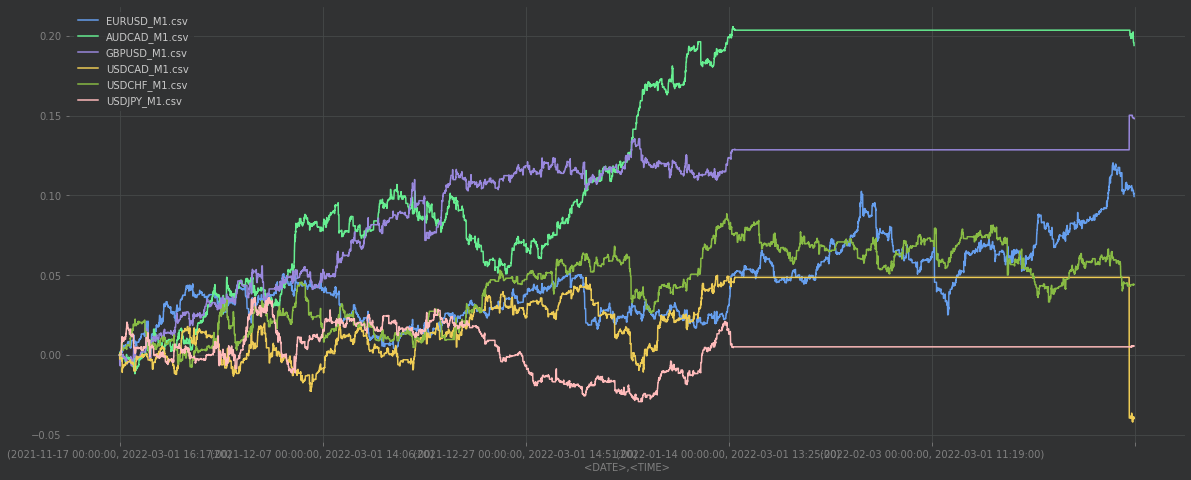

In [ ]:
# List of assets
listnames = ["EURUSD_M1.csv", "AUDCAD_M1.csv", "GBPUSD_M1.csv", "USDCAD_M1.csv", "USDCHF_M1.csv", "USDJPY_M1.csv"]
returns = pd.DataFrame()

# Compute the return of each strategy
for name in listnames:
  dfc = preprocessing_min(name)
  returns[name] = support_resistance(dfc, duration=10, spread=0.0001)

# Plot the results
returns.fillna(value=0).cumsum().plot()

# Portfolio advantage

In [ ]:
returns["portfolio"] = returns.sum(axis=1)/returns.shape[1]

In [ ]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [ ]:
# Empty dataframe
values = pd.DataFrame(index=["RETURN", "DRAWDOWN", "RETURN DRAWDOWN RATIO"])

# Compute return/drawdown
for col in returns.columns:
  ret = (returns[col].dropna().cumsum().iloc[-1])
  dd = -np.min(drawdown_function(returns[col].dropna()))
  ret_dd = ret/dd
  
  values[col] = ret,dd,ret_dd

values.transpose().sort_values(by="RETURN DRAWDOWN RATIO", ascending=False)

,RETURN,DRAWDOWN,RETURN DRAWDOWN RATIO
GBPUSD_M1.csv,0.148140,0.034325,4.315870
portfolio,0.075286,0.017643,4.267281
AUDCAD_M1.csv,0.194051,0.050614,3.833980
EURUSD_M1.csv,0.099394,0.070223,1.415415
USDCHF_M1.csv,0.044210,0.050860,0.869243
USDJPY_M1.csv,0.005651,0.062849,0.089915
USDCAD_M1.csv,-0.039733,0.087582,-0.453669
